# Titanic: Machine Learning from Disaster

## Predict survival on the Titanic and get familiar with ML basics

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


## Data Fields

  * **Survival** - Survival. 0 = No, 1 = Yes
  * **Pclass** - Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd
  * **Sex** - Sex.
  * **Age** - Age in years.
  * **SibSp** - # of siblings / spouses aboard the Titanic.
  * **Parch** - # of parents / children aboard the Titanic.
  * **Ticket** - Ticket number.
  * **Fare** - Passenger fare.
  * **Cabin** - Cabin number.
  * **Embarked** - Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton
  
  https://www.kaggle.com/c/titanic

In [1]:
# import pandas 
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv("data/train.csv", index_col=["PassengerId"])
# train data의 row/columns 수 확인
print(train.shape)
# train data top 5 리스트 확인
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 예측(predict) 하려는 필드 선택 
label_name = "Survived"

# 전체 train 데이터에서 결과값 데이터셋 준비
y = train[label_name]

print(y.shape)
y.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [4]:
# 제출용 test 데이터
test = pd.read_csv("data/test.csv", index_col=["PassengerId"])

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Preprocessing

In [5]:
# 성별을 feature 로 사용하기위해 수치형으로 encoding
# LabelEncoder 를 사용한 encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
train["Enc_Sex"] = labelencoder_X.fit_transform(train["Sex"])

print(train.shape)
train.head()

(891, 12)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Enc_Sex
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [6]:
# LabelEncoder 를 사용한 encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
test["Enc_Sex"] = labelencoder_X.fit_transform(test["Sex"])

print(test.shape)
test.head()

(418, 11)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Enc_Sex
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [7]:
train["Mr"] = train["Name"].str.find("Mr.") > 0
train["Mrs"] = train["Name"].str.find("Mrs.") > 0
train["Miss"] = train["Name"].str.find("Miss.") > 0
train["Master"] = train["Name"].str.find("Master.") > 0

print(train.shape)
train.head()

(891, 16)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Enc_Sex,Mr,Mrs,Miss,Master
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,True,False,False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,False,True,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,False,False,True,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,False,True,False,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,True,False,False,False


In [8]:
test["Mr"] = test["Name"].str.find("Mr.") > 0
test["Mrs"] = test["Name"].str.find("Mrs.") > 0
test["Miss"] = test["Name"].str.find("Miss.") > 0
test["Master"] = test["Name"].str.find("Master.") > 0

print(test.shape)
test.head()

(418, 15)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Enc_Sex,Mr,Mrs,Miss,Master
PassengerId,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,True,False,False,False
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,False,True,False,False
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,True,False,False,False
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,True,False,False,False
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,False,True,False,False


In [9]:
# train data 'Fare' 의 평균값을 구함
mean_fare = train["Fare"].mean()

print("Fare(Mean) = ${0:.3f}".format(mean_fare))

Fare(Mean) = $32.204


In [10]:
# test data 에만 Fare 값이 없는 data가 1건 있기 때문에 train data의 평균값을 채워줌
test.loc[pd.isnull(test["Fare"]), "Fare"] = mean_fare

test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Enc_Sex,Mr,Mrs,Miss,Master
PassengerId,,,,,,,,,,,,,,,


In [11]:
#feature_names = ["Pclass", "Enc_Sex", "Fare", "SibSp", "Parch", "Embarked","Mr","Mrs","Miss","Master"]
feature_names = ["Pclass", "Enc_Sex", "Fare", "SibSp", "Parch", "Embarked"]

# 전체 train 데이터에서 실제 train 할 데이터셋(DataFrame) 준비
X = train[feature_names]
X = pd.get_dummies(X)
print(X.shape)
X.head()

(891, 8)


,Pclass,Enc_Sex,Fare,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,3,1,7.2500,1,0,0,0,1
2,1,0,71.2833,1,0,1,0,0
3,3,0,7.9250,0,0,0,0,1
4,1,0,53.1000,1,0,0,0,1
5,3,1,8.0500,0,0,0,0,1


In [12]:
def normalize(x,mean=0, std =0, isTrainigData = True):
    if isTrainigData:
        mean = x.mean(axis=0)
        std = x.std(axis=0)
    return (x-mean)/std, mean, std

In [13]:
# train 데이터 검증을 위한 test 데이터 준비
from sklearn.model_selection import train_test_split
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size = 0.20, random_state = 0)
print(X_train_df.shape, X_test_df.shape, y_train_df.shape, y_test_df.shape)

(712, 8) (179, 8) (712,) (179,)


In [14]:
# kaggle 에 제출할 test 데이터 준비
X_test_submit = test[feature_names]
X_test_submit = pd.get_dummies(X_test_submit)
print(X_test_submit.shape)
X_test_submit.head()

(418, 8)


,Pclass,Enc_Sex,Fare,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,1,7.8292,0,0,0,1,0
893,3,0,7.0000,1,0,0,0,1
894,2,1,9.6875,0,0,0,1,0
895,3,1,8.6625,0,0,0,0,1
896,3,0,12.2875,1,1,0,0,1


In [15]:
import numpy as np
import tensorflow as tf
import time

In [16]:
# Dataframe 을 numpy 값으로 변경
X_train = X_train_df.values
y_train = y_train_df.values
X_test = X_test_df.values
y_test = y_test_df.values

In [17]:
n_features = X_train.shape[1]
n_classes = 2

In [18]:
# Input placeholders
with tf.name_scope('input'):
    x_placeholder = tf.placeholder(tf.float32,(None, n_features), name='X-input')
    y_placeholder = tf.placeholder(tf.int32, (None),name='y-output')    
    one_hot_y = tf.one_hot(y_placeholder, n_classes,name='onehot_output')
    prob = tf.placeholder(tf.float32)    

In [19]:
# ReLU 사용한 NN 구성

# W1 = tf.Variable(tf.random_normal([n_features, 512]))
# b1 = tf.Variable(tf.random_normal([512]))
# L1 = tf.nn.relu(tf.matmul(x_placeholder, W1) + b1)

# W2 = tf.Variable(tf.random_normal([512, 256]))
# b2 = tf.Variable(tf.random_normal([256]))
# L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

# W3 = tf.Variable(tf.random_normal([256, n_classes]))
# b3 = tf.Variable(tf.random_normal([n_classes]))
# hypothesis = tf.matmul(L2, W3) + b3

# ReLU 사용한 NN 구성

W1 = tf.get_variable("W1", shape=[n_features, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(x_placeholder, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([256]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[256, n_classes], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([n_classes]))
hypothesis = tf.matmul(L3, W4) + b4

In [20]:
rate = 0.001
reg_constant = 0.01
EPOCHS = 500
BATCH_SIZE = int(len(X_train)/1)

regularization_loss = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels = one_hot_y)
loss = tf.reduce_mean(cross_entropy)# + reg_constant * sum(regularization_loss)

optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_op = optimizer.minimize(loss)

In [21]:
# if predicton is correct
pred = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(tf.argmax(hypothesis,1), tf.argmax(one_hot_y,1))
accuracy_ops = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(x,y,sess):
    global BATCH_SIZE
    num_examples = len(x)
    total_accuracy = 0
    #sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x[offset:offset+BATCH_SIZE], y[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_ops, 
                          feed_dict={x_placeholder: batch_x, y_placeholder:batch_y, prob:1.0})
        total_accuracy += (accuracy*len(batch_x))
    return total_accuracy/num_examples

In [22]:
# initilisation of graph
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

epochs = []
list_train_accuracy = []
list_valid_accuracy = []
plt.ion()

Training ..

 EPOCH 500 ... Validation Accuracy = 0.816 ... Training Accuracy = 0.854 ...OCH 10 ... Validation Accuracy = 0.626 ... Training Accuracy = 0.625 ...EPOCH 90 ... Validation Accuracy = 0.810 ... Training Accuracy = 0.801 ... Validation Accuracy = 0.804 ... Training Accuracy = 0.809 ...

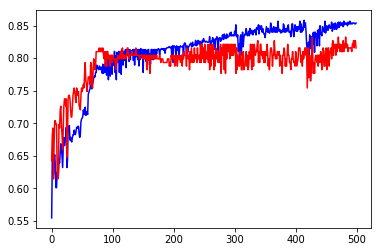

In [23]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
num_examples = len(X_train)
print("Training ..")
print()
for i in range(EPOCHS):
    x_train_sh, y_train_sh = X_train, y_train
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = x_train_sh[offset:end], y_train_sh[offset:end]
        sess.run(training_op,feed_dict={x_placeholder:batch_x, y_placeholder:batch_y,prob:1.0})

    valid_acc = evaluate(X_test, y_test,sess)
    train_acc = evaluate(X_train, y_train,sess)
    list_train_accuracy.append(train_acc)
    list_valid_accuracy.append(valid_acc)
    print('\r',"EPOCH {} ...".format(i+1),
          "Validation Accuracy = {:.3f} ...".format(valid_acc),
          "Training Accuracy = {:.3f} ...".format(train_acc),end='')
    if len(epochs) == 0:
        epochs.append(0)
    else:
        epochs.append(epochs[-1]+1)
plt.plot(epochs,list_train_accuracy,'b-',epochs,list_valid_accuracy,'r-')
plt.show()

In [24]:
X_test_arr = X_test_submit.values
predicted_labels = sess.run(pred, feed_dict={x_placeholder: X_test_arr,prob: 1.0})

In [25]:
d = {'PassengerId': test.index, 'Survived': predicted_labels}
prediction_df = pd.DataFrame(data=d)
print(prediction_df.shape)
prediction_df.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [26]:
# 저장할 파일을 구분하기 위해 파일명에 timestamp 정보 추가 하기 위한 작업 
from datetime import datetime

current_date = datetime.now()
current_date = current_date.strftime("%Y-%m-%d_%H-%M-%S")

description = "titanic-multilayer-nn"

filename = "{date}_{desc}.csv".format(date=current_date, desc=description)
filepath = "data/{filename}".format(filename=filename)

prediction_df.to_csv(filepath, index=False)